In [100]:
import urllib.request
import urllib.parse
import json
import pprint

class CoreApiRequestor:

    def __init__(self, endpoint = 'https://core.ac.uk:443/api-v2/', api_key = 'aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd'):
        self.endpoint = endpoint
        self.api_key = api_key
        #defaults
        self.pagesize = 100
        self.page = 1

    def parse_response(self, decoded):
        res = []
        for item in decoded['data']:
            doi = None
            if 'identifiers' in item:
                for identifier in item['identifiers']:
                    if identifier and identifier.startswith('doi:'):
                        doi = identifier
                        break
            res.append([item['title'], doi])
        return res

    def request_url(self, url):
        with urllib.request.urlopen(url) as response:
            html = response.read()
        return html

    def get_method_query_request_url(self,method,query,fullText,page):
        if (fullText):
            fullText = 'true'
        else:
            fullText = 'false'
        params = {
            'apiKey':self.api_key,
            'page':page,
            'pageSize':self.pagesize,
            'fulltext':fullText
        }
        return self.endpoint + method + '/' + urllib.parse.quote(query) + '?' + urllib.parse.urlencode(params)

    def get_up_to_x_pages_of_query(self,method,query,fulltext,x = 20):
        url = self.get_method_query_request_url(method,query,fulltext,1)
        all_articles=[]
        resp = self.request_url(url)
        result = json.loads(resp.decode('utf-8'))
        all_articles.append(result)
        if (result['totalHits']>100):
            numOfPages = int(result['totalHits']/self.pagesize)  #rounds down
            if (numOfPages>x):
                numOfPages=x
            for i in range(2,numOfPages):
                url = self.get_method_query_request_url(method,query,False,i)
                print(url)
                resp =self.request_url(url)
                all_articles.append(json.loads(resp.decode('utf-8')))
        return all_articles

In [101]:
'''
Example invokation
'''
# init 
endpoint = 'https://core.ac.uk/api-v2'

'''
********************************************
Add your own api key below
'''
api_key = 'aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd'
'''
********************************************
'''

core_api = CoreApiRequestor(endpoint,api_key)

In [102]:
method = '/articles/search'
topic = 'machine AND learning'

queryOnlyFT = '(title:('+topic+') OR description:('+topic+') OR fullText:('+topic+')) AND fullText:*'

url = core_api.get_method_query_request_url(method,topic,True,1)

In [120]:
result = core_api.get_up_to_x_pages_of_query(method,topic,True,1000)

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=2&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=3&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=4&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=5&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=6&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=7&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=8&pageSize=100&fulltext=false
https:

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=60&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=61&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=62&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=63&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=64&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=65&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=66&pageSize=100&fulltext=false

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=118&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=119&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=120&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=121&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=122&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=123&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=124&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=175&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=176&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=177&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=178&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=179&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=180&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=181&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=232&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=233&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=234&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=235&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=236&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=237&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=238&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=289&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=290&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=291&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=292&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=293&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=294&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=295&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=346&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=347&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=348&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=349&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=350&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=351&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=352&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=403&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=404&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=405&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=406&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=407&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=408&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=409&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=460&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=461&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=462&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=463&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=464&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=465&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=466&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=517&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=518&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=519&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=520&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=521&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=522&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=523&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=574&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=575&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=576&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=577&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=578&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=579&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=580&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=631&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=632&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=633&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=634&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=635&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=636&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=637&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=688&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=689&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=690&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=691&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=692&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=693&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=694&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=745&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=746&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=747&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=748&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=749&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=750&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=751&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=802&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=803&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=804&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=805&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=806&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=807&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=808&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=859&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=860&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=861&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=862&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=863&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=864&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=865&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=916&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=917&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=918&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=919&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=920&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=921&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=922&pageSize=100&fulltex

https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=973&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=974&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=975&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=976&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=977&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=978&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/articles/search/machine%20AND%20learning?apiKey=aYhR5Ox6GKIXHl1pzujCoBAwQq4fcrvd&page=979&pageSize=100&fulltex

In [121]:
import pickle
f = open('machine-AND-learning_1000-page_dump.pkl','wb+')
pickle.dump(result,f)
f.close()

In [2]:
import pickle
f = open('machine-AND-learning_1000-page_dump.pkl','rb')
result = pickle.load(f)
f.close()

In [17]:
docs = []
fields = []
for page in result:
    dt = page['data']
    for article in dt:
        for key in article.keys():
            if key not in fields:
                fields.append(key)
        if ('description' in article) and ('title' in article):
            docs.append(article['title'] + ' . ' + article['description'])
        elif ('description' in article):
            docs.append(article['description'])
        elif ('title' in article):
            docs.append(article['title'])

In [19]:
print(len(docs))
print(fields)

18990
['id', 'authors', 'contributors', 'datePublished', 'description', 'fullText', 'identifiers', 'language', 'relations', 'repositories', 'subjects', 'title', 'topics', 'types', 'year', 'fulltextIdentifier', 'oai', 'downloadUrl', 'doi', 'publisher', 'journals']


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(input = 'content', ngram_range=(1,3), stop_words='english')

In [5]:
docs_mat = tfidf.fit_transform(docs)

In [20]:
print(docs_mat.size)

4634433


In [24]:
docs_mat[0,1219076]

0.11697559462072363

In [21]:
import numpy as np

hist = np.zeros((100,))

rows, cols = docs_mat.nonzero()

for row,col in zip(rows, cols):
    hist[int(np.floor(docs_mat[row,col]*100))] += 1 

C:\Users\tg\Anaconda3\envs\MA\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


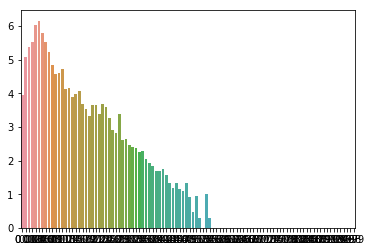

In [27]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from seaborn import barplot
#print(hist)
log_hist = np.log10(hist.flatten())
barplot(x=np.linspace(0.0,0.99,100),y=log_hist)
plt.show()

In [46]:
#70-20-10 Confidence Interval
summer = 0
bound_070 = 0
bound_090 = 0
bound_095 = 0

print(len(hist))

for cnt, bn in enumerate(hist):
    #print(cnt, bn)
    summer += bn
    if summer >= 0.7 * docs_mat.size and bound_070 == 0:
        print(docs_mat.size - summer)
        bound_070 = cnt
        print(bound_070)
    elif summer >= 0.9 * docs_mat.size and bound_090 == 0:
        print(docs_mat.size - summer)
        bound_090 = cnt
        print(bound_090)
    elif summer >= 0.95 * docs_mat.size and bound_095 == 0:
        print(docs_mat.size - summer)
        bound_095 = cnt
        print(bound_095)



100
1388909.0
5
462740.0
7
226982.0
9


In [52]:
import numpy as np
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

stop_words_dict = []
for word in ENGLISH_STOP_WORDS:
    stop_words_dict.append(word)

rows, cols = docs_mat.nonzero()

lower_bound = 0.07
upper_bound = 1

words = tfidf.get_feature_names()

for row,col in zip(rows, cols):
    if docs_mat[row,col] < lower_bound and docs_mat[row,col] > upper_bound:
        stop_words_dict.append()

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(input = 'content', ngram_range=(1,3), stop_words=stop_words_dict)
tf = tf_vectorizer.fit_transform(docs)

In [55]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(verbose = 1)
lda.fit(tf)

C:\Users\tg\Anaconda3\envs\MA\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


KeyboardInterrupt: 